In [15]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("advertising.csv")
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         20 non-null     float64
 1   Radio      20 non-null     float64
 2   Newspaper  20 non-null     float64
 3   Sales      20 non-null     float64
dtypes: float64(4)
memory usage: 772.0 bytes


In [17]:
data.describe()

,TV,Radio,Newspaper,Sales
count,20.000000,20.000000,20.000000,20.00000
mean,119.310000,27.740000,42.010000,13.49500
std,84.178425,15.442573,29.596797,5.43289
min,8.600000,2.100000,1.000000,4.80000
25%,54.250000,17.400000,18.900000,9.60000
50%,108.850000,32.850000,45.550000,12.15000
75%,196.500000,39.375000,60.350000,17.67500
max,281.400000,48.900000,114.000000,24.40000


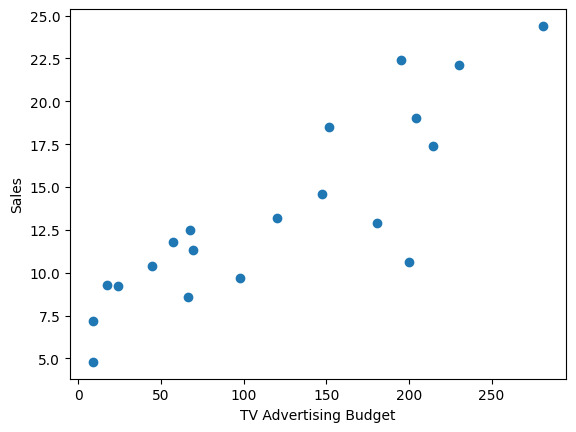

In [18]:
import matplotlib.pyplot as plt

plt.scatter(data['TV'], data['Sales'])
plt.xlabel("TV Advertising Budget")
plt.ylabel("Sales")
plt.show()

In [19]:
X = data[['TV']]  
y = data['Sales']  

In [20]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, random_state=42
)

In [21]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [22]:
model.fit(x_train, y_train)

LinearRegression()

In [23]:
print("Slope:", model.coef_)

Slope: [0.04292742]


In [24]:
print("Intercept:", model.intercept_)

Intercept: 7.526390583104876


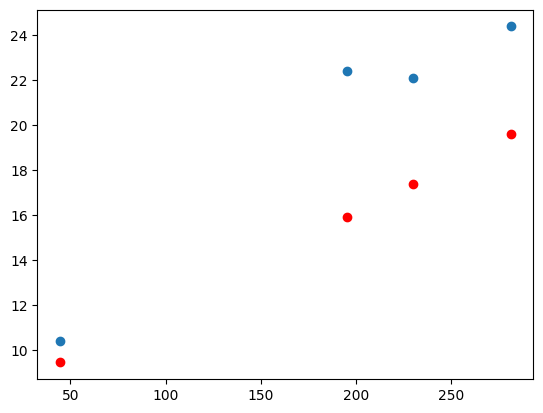

In [28]:
y_pred = model.predict(x_test)
plt.scatter(x_test['TV'], y_test)
plt.scatter(x_test['TV'], y_pred, color='red')

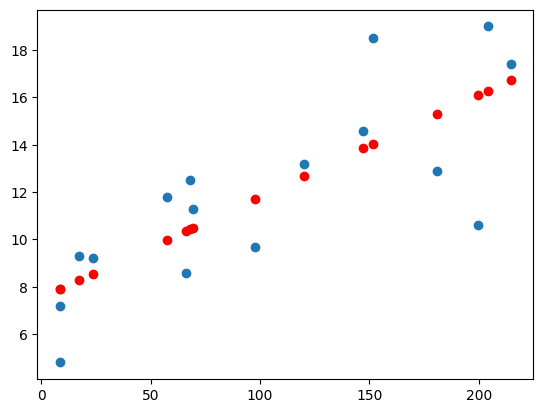

In [32]:
ypred = model.predict(x_train)
plt.scatter(x_train['TV'], y_train)
plt.scatter(x_train['TV'], ypred, color='red')

In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

In [36]:
mse

22.006062348424845

In [37]:
mae

4.234693058062244

In [39]:
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

R2 Score: 0.27592284620725605


In [40]:
model.score(x_train,y_train)

0.6171092728074343

# Conclusion


## The R² score is comparatively low because only one independent variable (TV advertising) was used to predict sales.
## Sales are influenced by multiple factors; hence, TV alone cannot explain all the variability.
## However, the positive slope confirms a linear relationship, validating the use of linear regression.